---
# DELL LEAD - Curso de Visualização de Dados 📊

<b> Oficina - Aula 2.2 </b>

Este notebook tem como objetivo analisar os [dados](https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt) de vendas de jogos eletrônicos, nas diversas plataformas existentes.

Por: Pedro Florencio de Almeida Neto

---

<b>(Questão 1)</b> Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste [link](https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt), em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


🕹 O dataset conta com 16598 instâncias (observações) e 10 atributos (colunas). Os atributos seguem a seguinte formatação:

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

🕹 Há 271 jogos que não constam ano de lançamento e 58 que não há o nome do publisher.

---
<b>(Questão 2)</b> Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo

* <b>Opção 1</b> - Gráfico de pizza

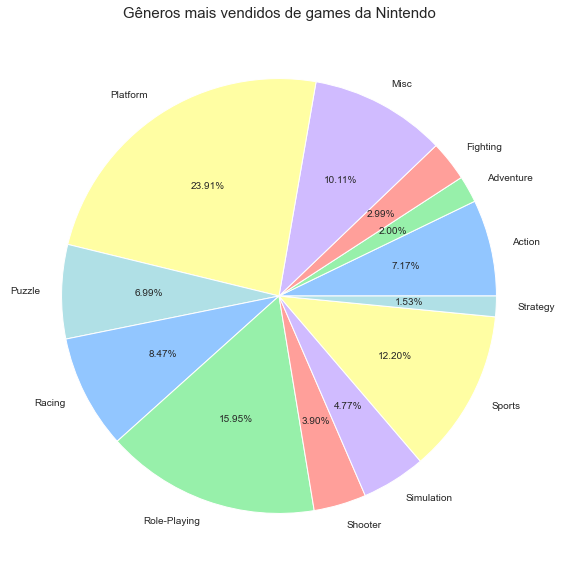

In [192]:
jogosNintendo = df[df['Publisher']=='Nintendo'] # Seleção do DataFrame apenas de jogos da Nintendo
df2 = jogosNintendo.groupby(by='Genre').sum() # Agrupando por gênero e somando valores para se obter o total de vendas globais em cada gênero

plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,10))
plt.title('Gêneros mais vendidos de games da Nintendo',fontdict={'fontsize':15})
plt.pie(x=df2['Global_Sales'],labels=df2.index,autopct='%1.2f%%')
plt.show()

* <b>Opção 2</b> - Gráfico de rosca

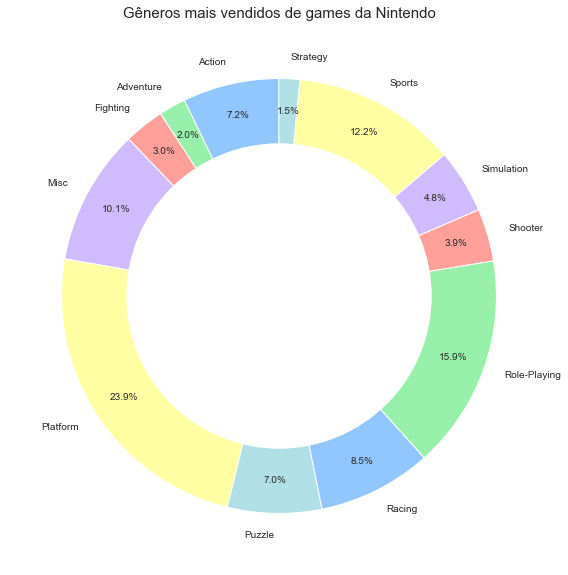

In [179]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-pastel')
plt.pie(x=df2['Global_Sales'], labels=df2.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gêneros mais vendidos de games da Nintendo',fontdict={'fontsize':15})
plt.show()

* <b>Opção 3</b> - Gráfico de barras

In [180]:
genre = jogosNintendo.groupby(by='Genre').sum().sort_values(by='Global_Sales',ascending=False)
genre

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Platform,245890,222146.0,220.14,85.21,102.36,19.47,427.21
Role-Playing,374106,210720.0,105.63,63.92,102.24,13.07,284.90
Sports,186935,110069.0,98.77,66.18,35.87,17.18,218.01
Misc,523309,200625.0,61.98,51.62,55.25,11.78,180.67
Racing,82066,73967.0,73.55,39.75,29.22,8.81,151.30
Action,359543,156516.0,63.49,29.02,29.24,6.48,128.18
Puzzle,327830,148134.0,55.74,26.42,37.09,5.53,124.88
Simulation,112905,56156.0,29.70,26.05,23.67,5.86,85.27
Shooter,98683,48030.0,51.39,9.85,6.07,2.39,69.73


In [181]:
porcentagens = (genre['Global_Sales']*100)/(genre['Global_Sales'].sum())
porcentagens

Genre
Platform        23.912435
Role-Playing    15.946848
Sports          12.202781
Misc            10.112731
Racing           8.468789
Action           7.174682
Puzzle           6.989970
Simulation       4.772860
Shooter          3.903032
Fighting         2.986186
Adventure        1.998813
Strategy         1.530875
Name: Global_Sales, dtype: float64

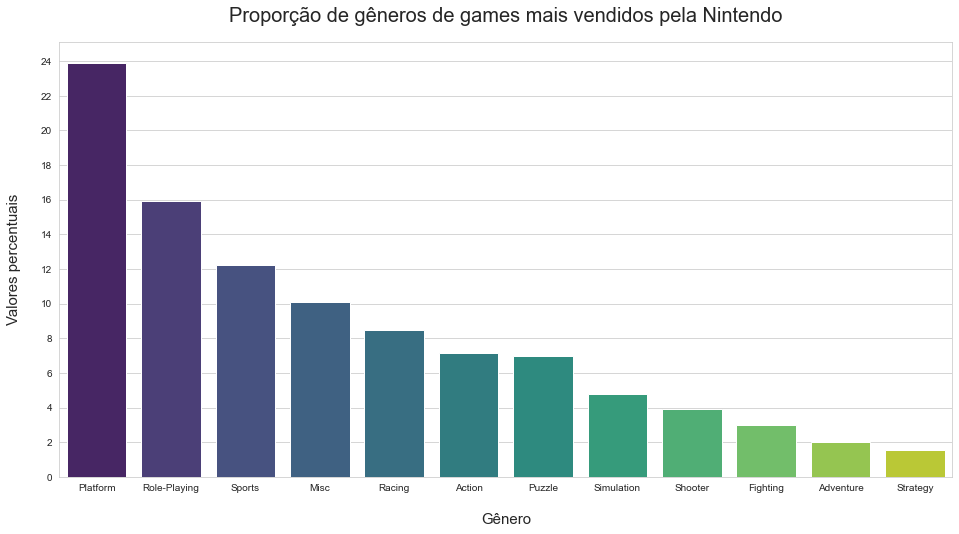

In [182]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.barplot(x=genre.index,y=porcentagens,data=genre,palette='viridis')
import numpy as np
plt.yticks(ticks=np.arange(0,26,2))
plt.xlabel('Gênero',fontdict={'fontsize':15},labelpad=20)
plt.ylabel('Valores percentuais',fontdict={'fontsize':15},labelpad=20)
plt.title('Proporção de gêneros de games mais vendidos pela Nintendo',fontdict={'fontsize':20},pad=20)
plt.show()

🕹 Devido ao elevado número de classes, o <b>gráfico de pizzas</b> impossibilita uma visão clara dos dados que estamos trabalhando. Apesar do <b>gráfico de rosca</b> amenizar um pouco esta dificuldade, é no <b>gráfico de barras</b> que podemos obter uma visualização mais funcional e reveladora da proporção dos jogos.

---
<b>(Questão 3)</b> Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.

In [183]:
semAno = df[df['Year'].isnull()]
semAno.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


🕹 Infelizmente, iremos perder 271 jogos que não há data de lançamento. Há jogos que são de esportes e são lançados anualmente como Fifa Soccer, Madden NFL e WWE. Uma estratégia seria completar o atributo faltante com o inteiro anterior ao ano que é especificado no título, visto que geralmente são lançados no final ano anterior.

In [184]:
games = df[df['Year']>=2015] # DataFrame com todos os jogos a partir de 2015
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


In [185]:
len(games) # Temos 962 jogos que se encaixam nessa condição

962

In [186]:
df3 = games.groupby(by='Platform').count() # Agrupando por plataforma
df3

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
3DS,121,121,121,121,121,121,121,121,121,121
DS,1,1,1,1,1,1,1,1,1,1
PC,88,88,88,88,88,88,88,88,88,88
PS3,106,106,106,106,106,106,106,106,106,106
PS4,245,245,245,245,245,245,245,245,245,245
PSP,3,3,3,3,3,3,3,3,3,3
PSV,175,175,175,175,173,175,175,175,175,175
Wii,4,4,4,4,4,4,4,4,4,4
WiiU,38,38,38,38,38,38,38,38,38,38


* <b>Opção 1</b> - Gráfico de pizza

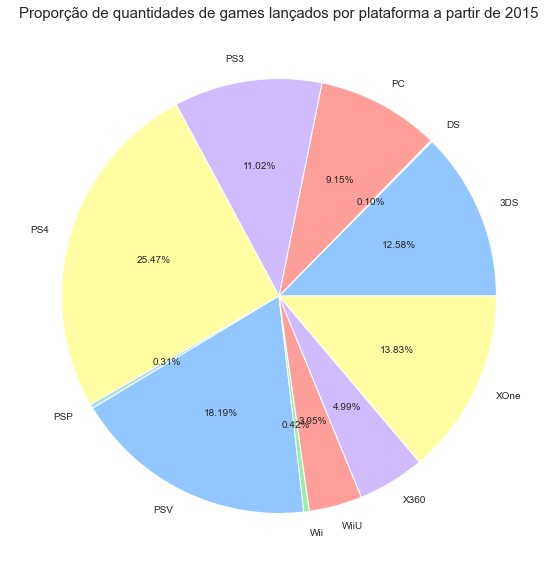

In [187]:
plt.figure(figsize=(10,10))
plt.pie(x=df3['Rank'],labels=df3.index,autopct='%1.2f%%')
plt.title('Proporção de quantidades de games lançados por plataforma a partir de 2015',fontdict={'fontsize':15})
plt.show()

* <b>Opção 2</b> - Gráfico de rosca

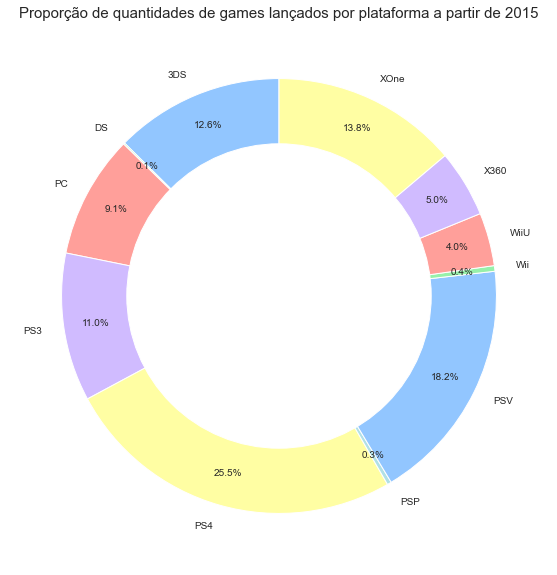

In [188]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-pastel')
plt.pie(x=df3['Rank'], labels=df3.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Proporção de quantidades de games lançados por plataforma a partir de 2015',fontdict={'fontsize':15})
plt.show()

* <b>Opção 3</b> - Gráfico de barras

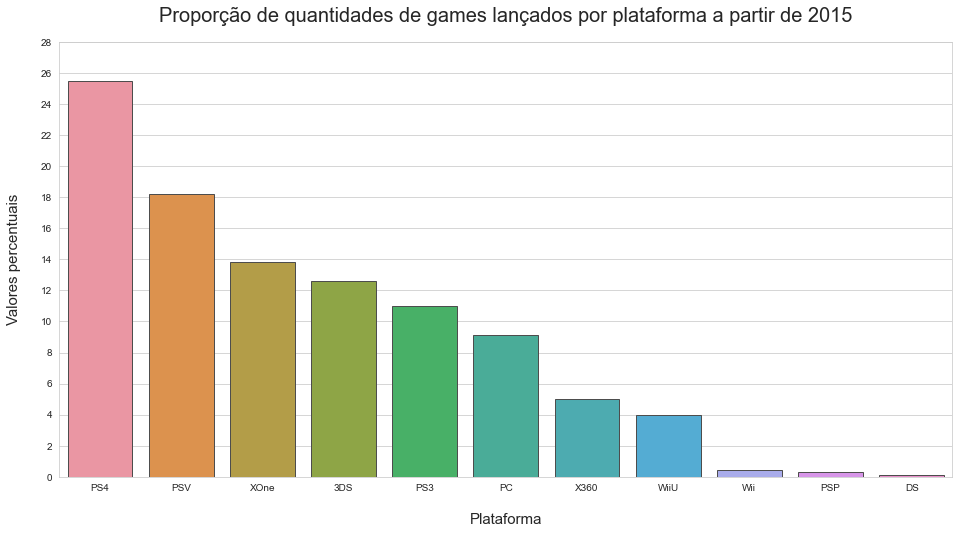

In [189]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
df4 = df3.sort_values(by='Rank',ascending=False)
porcent = df4['Rank']*100/df4['Rank'].sum()
sns.barplot(x=df4.index,y=porcent,data=df4,edgecolor='0.3')
plt.yticks(ticks=np.arange(0,30,2))
plt.xlabel('Plataforma',fontdict={'fontsize':15},labelpad=20)
plt.ylabel('Valores percentuais',fontdict={'fontsize':15},labelpad=20)
plt.title('Proporção de quantidades de games lançados por plataforma a partir de 2015',fontdict={'fontsize':20},pad=20)
plt.show()

🕹 Conforme o primeiro caso, a melhor visualização é a do gráfico de barras, por conter muitas classes. Entretanto, fica difícil distinguir as três plataformas com menor quantidade de jogos lançados. Isso pode ser resolvido através da sobreposição de um novo gráfico, focando estas plataformas:

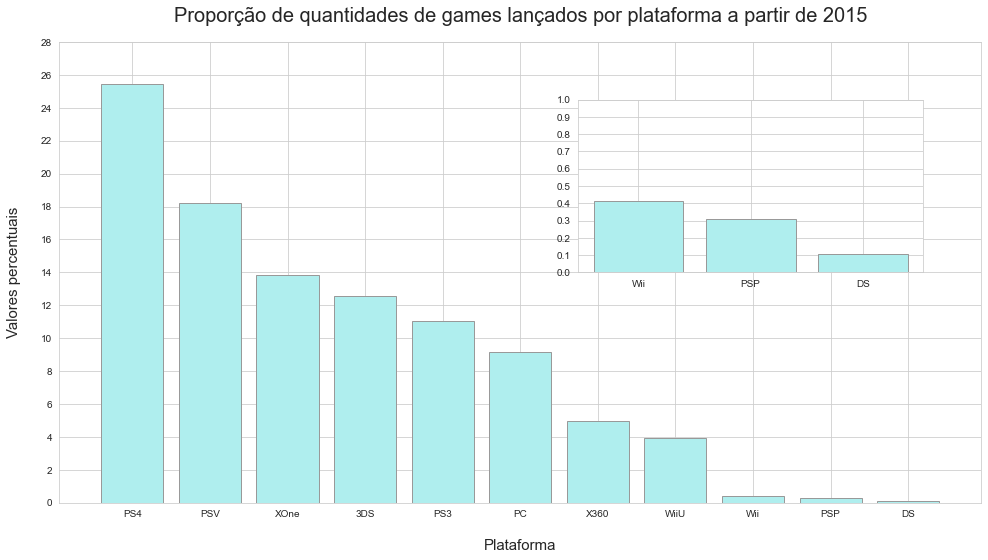

In [193]:
fig = plt.figure(figsize=(16,8))

axes1 = fig.add_axes([0.1,0.1,0.8,0.8]) # Criação dos dois gráficos
axes2 = fig.add_axes([0.55,0.5,0.3,0.3])

plataforma = list(df4.index)
porcentagens = list((df4['Rank']*100)/(df4['Rank'].sum())) # Como não usaremos a Seaborn, não podemos trabalhar com dataframes no plot

axes1.bar(x=plataforma,height=porcentagens,color='paleturquoise',edgecolor='0.6')
axes1.set_yticks(ticks=np.arange(0,30,2))
axes1.set_xlabel('Plataforma',fontdict={'fontsize':15},labelpad=20)
axes1.set_ylabel('Valores percentuais',fontdict={'fontsize':15},labelpad=20)
axes1.set_title('Proporção de quantidades de games lançados por plataforma a partir de 2015',fontdict={'fontsize':20},pad=20)


df5 = df4[df4['Rank']<30] # Seleção do DataFrame das 3 plataformas com menor lançamento

plataforma2 = list(df5.index)
porcentagens2 = list((df5['Rank']*100)/(df4['Rank'].sum())) # Definindo eixos x e y do segundo plot

axes2.bar(x=plataforma2,height=porcentagens2,color='paleturquoise',edgecolor='0.6')
axes2.set_yticks(ticks=np.arange(0,1.1,0.1))

plt.show()

<b> Obrigado! </b>

---